In [ ]:
!pip install -U scikit-learn==0.20


     |████████████████████████████████| 5.3MB 5.6MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
mnist_train = pd.read_csv("/content/train.csv")

In [ ]:
mnist_train

,Image_Id,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26,p27,p28,p29,p30,p31,p32,p33,p34,p35,p36,p37,p38,...,p745,p746,p747,p748,p749,p750,p751,p752,p753,p754,p755,p756,p757,p758,p759,p760,p761,p762,p763,p764,p765,p766,p767,p768,p769,p770,p771,p772,p773,p774,p775,p776,p777,p778,p779,p780,p781,p782,p783,labels
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8435,8435,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8436,8436,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8437,8437,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
8438,8438,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
X=mnist_train.iloc[:,1:785].values
y=mnist_train["labels"].values
X.shape


(8440, 784)

In [ ]:
y

array([1, 1, 1, ..., 2, 1, 0])

In [ ]:
y.shape

(8440,)

In [ ]:
#from sklearn.preprocessing import scale
#x_scaled = scale(X)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)              #splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)              #splitting into train and test

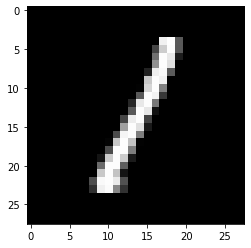

1


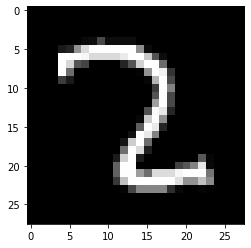

2


In [ ]:
def plot_image(img):
    plt.imshow(img.reshape(28,28),cmap="gray")
    plt.show()

plot_image(X_train[35])  
print(y_train[35])

plot_image(X_train[80])  
print(y_train[80])


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
k_range=list(range(1,25))
params=dict(n_neighbors=k_range)
#params = [{"n_neighbors" : [3,5,7,9,11]}]
grid_search = GridSearchCV(knn, params,cv=10,verbose=3,n_jobs=-1,scoring = 'accuracy')
grid_search.fit(X_train, y_train)
'''
knn.fit(X_train,y_train)
score_knn=knn.score(X_test,y_test)
print(score_knn)
'''                             #accuracy score of knn model



Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 23.3min finished


'knn.fit(X_train,y_train)\nscore_knn=knn.score(X_test,y_test)\nprint(score_knn)'

In [ ]:
grid_search.best_params_


{'n_neighbors': 1}

In [ ]:
grid_search.best_score_


0.9922326815061371

In [ ]:
model= KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,y_train)
score_knn= model.score(X_test,y_test)
print(score_knn)
mnist_test =pd.read_csv("/content/test.csv")
test_data=mnist_test.iloc[:,1:785].values
y_pred = model.predict(test_data)
print(y_pred)

0.9964454976303317
[0 0 0 ... 1 1 0]


In [ ]:
results = pd.DataFrame(columns=["Image_Id","labels"])
results.iloc[:,0] = list(range(0, len(test_data)))
results.iloc[:,1] = list(y_pred)
print(results.head())
results.to_csv('submission.csv', index = False)


   Image_Id  labels
0         0       0
1         1       0
2         2       0
3         3       0
4         4       1
